1. Demo: Working with database
- Download the database file from url='https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/QR9YeprUYhOoLafzlLspAw/survey-results-public.sqlite'
- Install the required libraries and import them
- Connect to the SQLite database
2. Demo: Basic SQL queries

3. Demo 1: Count the number of rows in the table
4. Demo 2: List all tables
5. Demo 3: Group data by age
6. Visualizing Data with Histograms
    1. Visualizing the distribution of data (Histograms)

        1.1 Histogram of `CompTotal` (Total Compensation)

        1.2 Histogram of YearsCodePro (Years of Professional Coding Experience)
         - Objective: Plot a histogram of `YearsCodePro` to analyze the distribution of coding experience among respondents.
    2. Visualizing Relationships in Data

        2.1 Histogram Comparison of `CompTotal` by `Age` Group

        - Objective: Use histograms to compare the distribution of CompTotal across different Age groups.

        2.2 Histogram of TimeSearching for Different Age Groups

        - Objective: Use histograms to explore the distribution of `TimeSearching` (time spent searching for information) for respondents across different age groups.
    3. Visualizing the Composition of Data

        3.1 Histogram of Most Desired Databases (`DatabaseWantToWorkWith`)

        - Objective: Visualize the most desired databases for future learning using a histogram of the top 5 databases.
    4. Visualizing Comparison of Data

        4.1 Histogram of Median CompTotal for Ages 45 to 60

        -   Objective: Plot the histogram for `CompTotal` within the age group 45 to 60 to analyze compensation distribution among mid-career respondents.

        4.2 Histogram of Job Satisfaction (`JobSat`) by YearsCodePro

        - Objective: Plot the histogram for `JobSat` scores based on respondents' years of professional coding experience.

7. Final step: Close the database connection

Once you've completed the lab, make sure to close the connection to the SQLite database

Downloaded survey-data.sqlite successfully!
Connected to database.
Tables in database: ['main']
Total rows in main: 65437
                  Age  count
0     18-24 years old  14098
1     25-34 years old  23911
2     35-44 years old  14942
3     45-54 years old   6249
4     55-64 years old   2575
5   65 years or older    772
6   Prefer not to say    322
7  Under 18 years old   2568


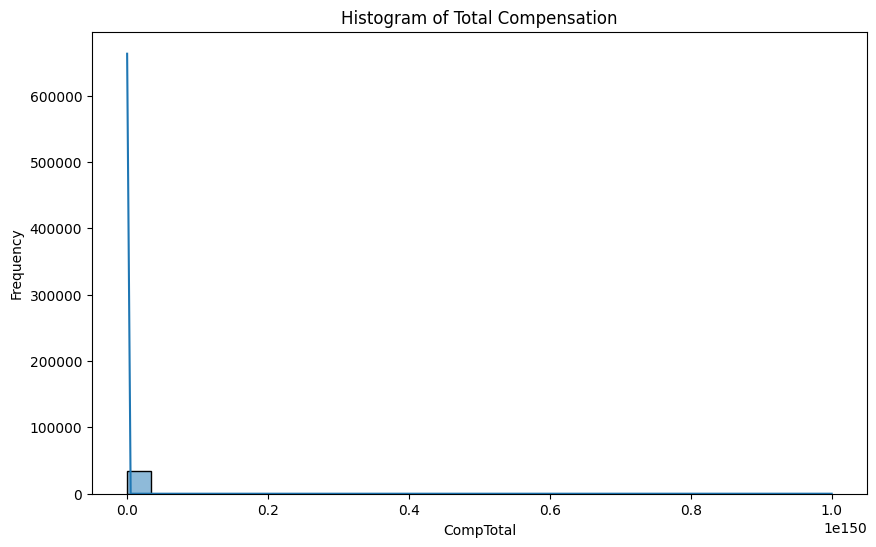

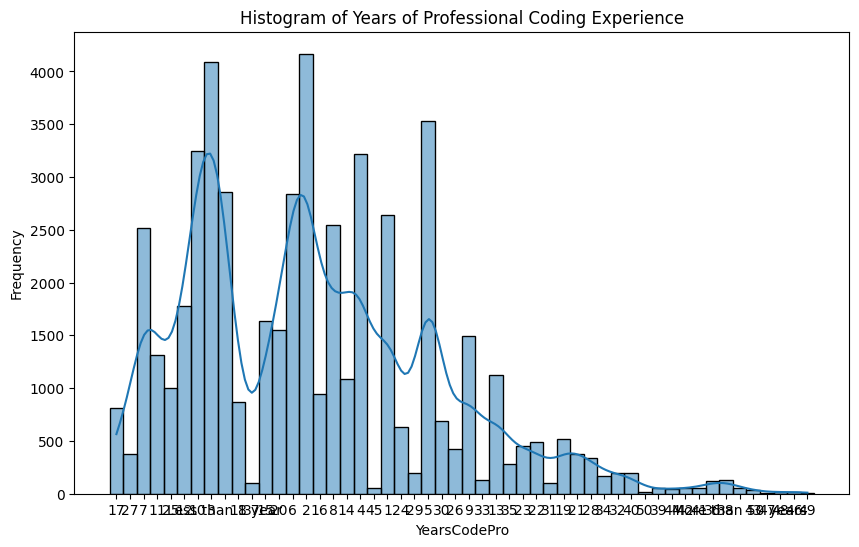

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


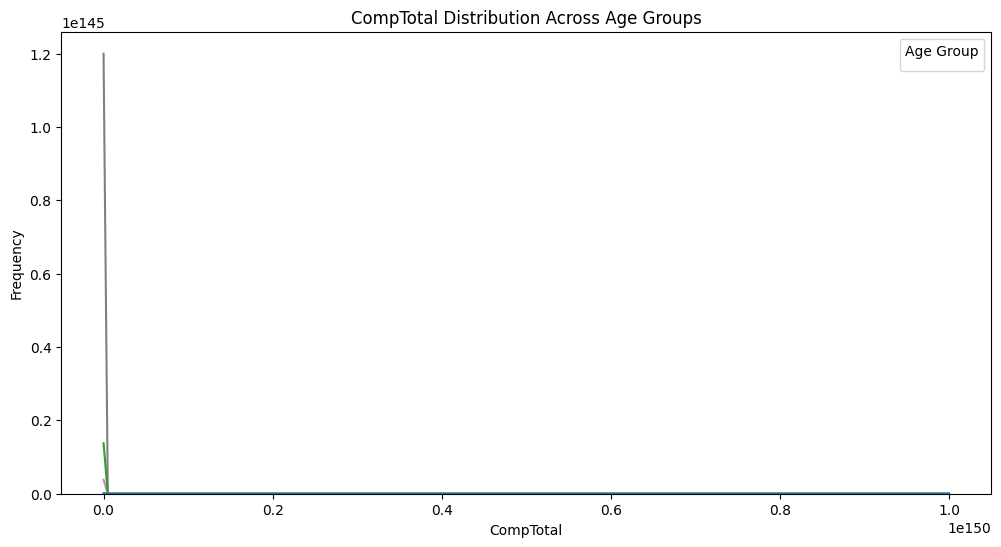

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


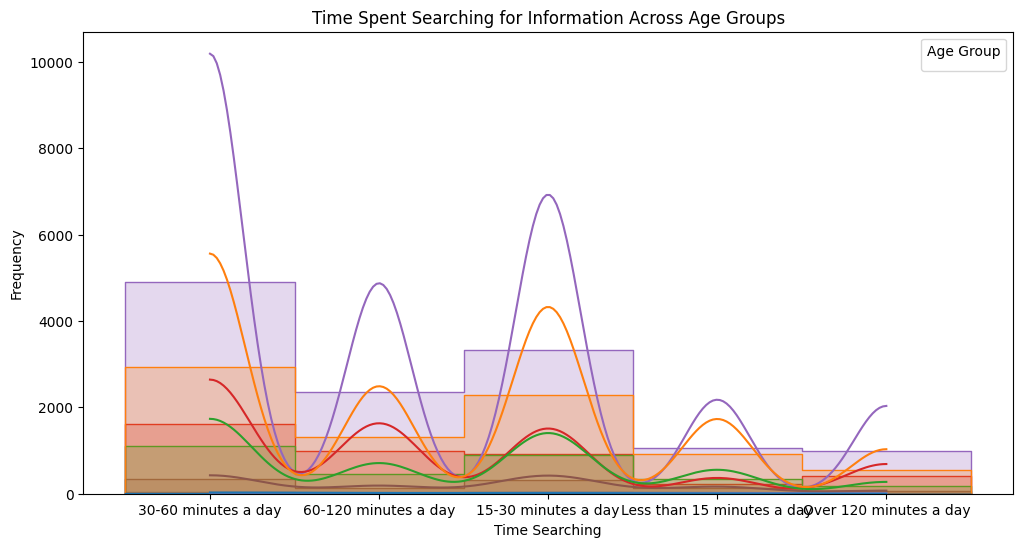

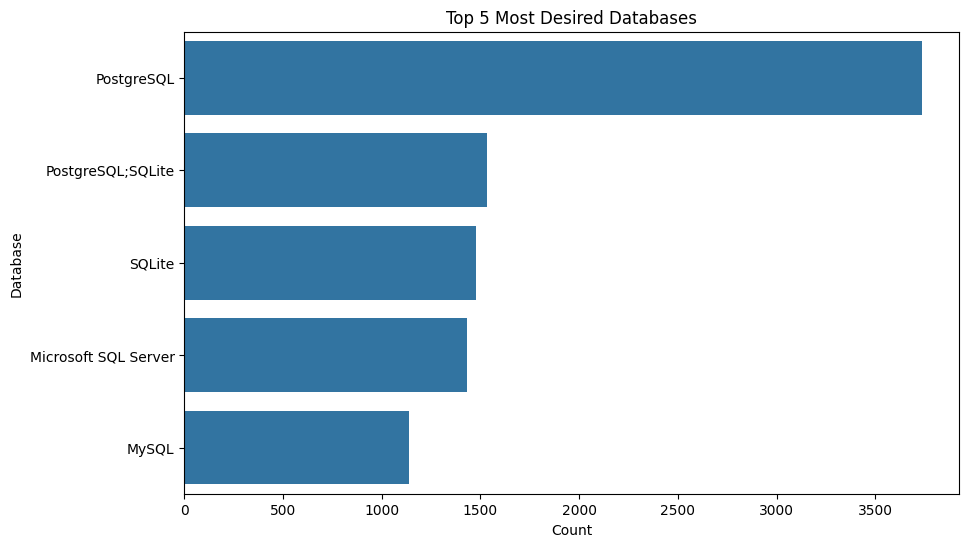


Standardized 'Age' column.


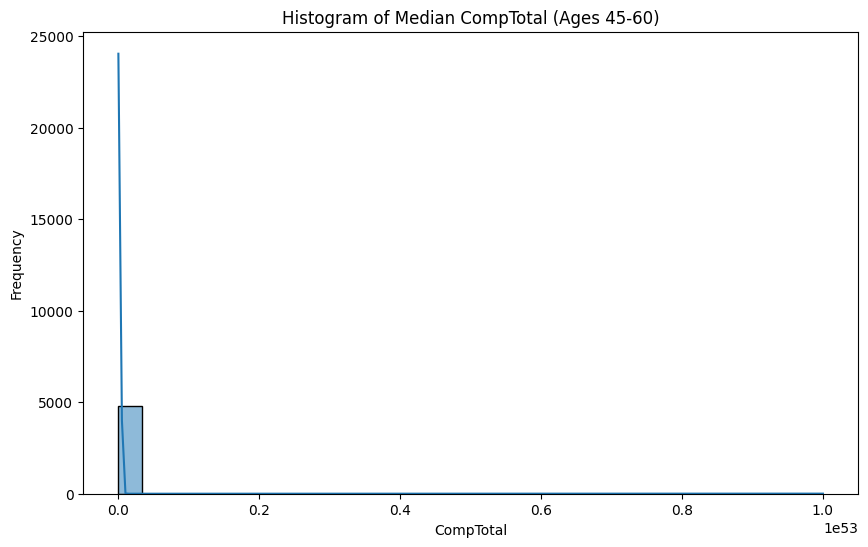

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


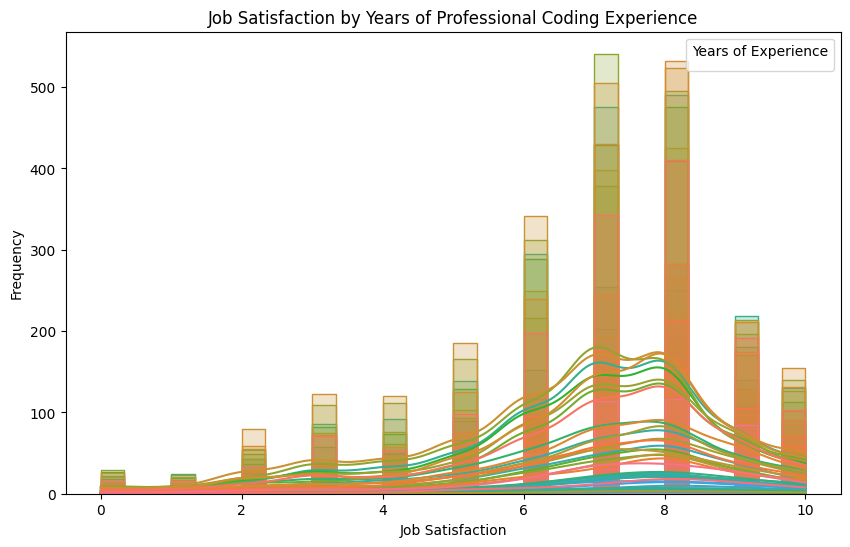

Database connection closed.


In [31]:
import sqlite3
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import requests
import os

def download_database(url, filename="survey-results-public.sqlite"):
    """Download the SQLite database file if not already present."""
    if not os.path.exists(filename):
        import requests

        filename = "survey-data.sqlite"
        response = requests.get(url)
        with open(filename, "wb") as file:
            file.write(response.content)

        print(f"Downloaded {filename} successfully!")
    else:
        print("Database file already exists.")
    return filename

def connect_to_database(filename):
    """Connect to the SQLite database and return the connection and cursor."""
    conn = sqlite3.connect(filename)
    cursor = conn.cursor()
    print("Connected to database.")
    return conn, cursor

def count_rows(cursor, table_name):
    """Count the number of rows in a table."""
    cursor.execute(f"SELECT COUNT(*) FROM {table_name}")
    count = cursor.fetchone()[0]
    print(f"Total rows in {table_name}: {count}")
    return count

def list_tables(cursor):
    """List all tables in the database."""
    cursor.execute("SELECT name FROM sqlite_master WHERE type='table'")
    tables = [row[0] for row in cursor.fetchall()]
    print("Tables in database:", tables)
    return tables

def group_by_age(cursor, table_name):
    """Group data by age and return the counts."""
    query = f"SELECT Age, COUNT(*) as count FROM {table_name} GROUP BY Age ORDER BY Age"
    df = pd.read_sql(query, conn)
    print(df)
    return df

def plot_histogram(df, column, title, xlabel, bins=30):
    """Plot a histogram for a specified column in the dataframe."""
    plt.figure(figsize=(10, 6))
    sns.histplot(df[column].dropna(), bins=bins, kde=True)
    plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel("Frequency")
    plt.show()

def standardize_entries(df, column_name, mapping_dict):
    """
    Standardizes entries in a column by mapping inconsistent values to a consistent format.

    Parameters:
        df (pd.DataFrame): The DataFrame to modify.
        column_name (str): The column to standardize.
        mapping_dict (dict): A dictionary mapping old values to new standardized values.

    Returns:
        pd.DataFrame: The DataFrame with standardized column entries.
    """
    df[column_name] = df[column_name].replace(mapping_dict)
    print(f"\nStandardized '{column_name}' column.")
    return df

def visualize_data(conn, table_name):
    """Visualize various histograms based on the dataset."""
    df = pd.read_sql(f"SELECT * FROM {table_name}", conn)
    
    # 1.1 Histogram of CompTotal
    plot_histogram(df, 'CompTotal', 'Histogram of Total Compensation', 'CompTotal')
    
    # 1.2 Histogram of YearsCodePro
    plot_histogram(df, 'YearsCodePro', 'Histogram of Years of Professional Coding Experience', 'YearsCodePro')
    
    # 2.1 Histogram Comparison of CompTotal by Age Group
    plt.figure(figsize=(12, 6))
    sns.histplot(df, x='CompTotal', hue='Age', bins=30, kde=True, element='step', common_norm=False)
    plt.title("CompTotal Distribution Across Age Groups")
    plt.xlabel("CompTotal")
    plt.ylabel("Frequency")
    plt.legend(title="Age Group")
    plt.show()
    
    # 2.2 Histogram of TimeSearching for Different Age Groups
    plt.figure(figsize=(12, 6))
    sns.histplot(df, x='TimeSearching', hue='Age', bins=30, kde=True, element='step', common_norm=False)
    plt.title("Time Spent Searching for Information Across Age Groups")
    plt.xlabel("Time Searching")
    plt.ylabel("Frequency")
    plt.legend(title="Age Group")
    plt.show()
    
    # 3.1 Histogram of Most Desired Databases
    plt.figure(figsize=(10, 6))
    sns.countplot(y=df['DatabaseWantToWorkWith'], order=df['DatabaseWantToWorkWith'].value_counts().index[:5])
    plt.title("Top 5 Most Desired Databases")
    plt.xlabel("Count")
    plt.ylabel("Database")
    plt.show()
    
    # 4.1 Histogram of Median CompTotal for Ages 45 to 60
    # Map Age to approximate numeric values (assuming Age is in string format)
    age_mapping = {
        'Under 18 years old': 17,
        '18-24 years old': 21,
        '25-34 years old': 32,
        '35-44 years old': 39,
        '45-54 years old': 49,
        '55-64 years old': 59,
        '65 years or older': 65
    }
    df = standardize_entries(df, 'Age', age_mapping)
    df['Age'] = pd.to_numeric(df['Age'], errors='coerce')
    
    df_filtered = df[(df['Age'] >= 45) & (df['Age'] <= 60)]
    plot_histogram(df_filtered, 'CompTotal', 'Histogram of Median CompTotal (Ages 45-60)', 'CompTotal')
    
    # 4.2 Histogram of Job Satisfaction by YearsCodePro
    plt.figure(figsize=(10, 6))
    sns.histplot(df, x='JobSat', hue='YearsCodePro', bins=30, kde=True, element='step', common_norm=False)
    plt.title("Job Satisfaction by Years of Professional Coding Experience")
    plt.xlabel("Job Satisfaction")
    plt.ylabel("Frequency")
    plt.legend(title="Years of Experience")
    plt.show()

def close_connection(conn):
    """Close the database connection."""
    conn.close()
    print("Database connection closed.")

# Main Execution
if __name__ == "__main__":
    url = 'https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/QR9YeprUYhOoLafzlLspAw/survey-results-public.sqlite'
    db_file = download_database(url)
    
    conn, cursor = connect_to_database(db_file)
    tables = list_tables(cursor)
    
    # Assuming main survey table is 'survey_results_public'
    main_table = 'main'
    count_rows(cursor, main_table)
    group_by_age(cursor, main_table)
    
    visualize_data(conn, main_table)
    
    close_connection(conn)
